In [12]:
import glob

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import xarray as xr
import numpy as np
import cmocean
import geopandas as gp
import cartopy.io.shapereader as shpreader

from unseen import fileio
from unseen import spatial_selection
from unseen import time_utils

## Spatial info

In [47]:
# CAFE grid

lat_bounds = np.array([-90.      , -88.988764, -86.966292, -84.94382 , -82.921348, -80.898876,
       -78.876404, -76.853933, -74.831461, -72.808989, -70.786517, -68.764045,
       -66.741573, -64.719101, -62.696629, -60.674157, -58.651685, -56.629213,
       -54.606742, -52.58427 , -50.561798, -48.539326, -46.516854, -44.494382,
       -42.47191 , -40.449438, -38.426966, -36.404494, -34.382022, -32.359551,
       -30.337079, -28.314607, -26.292135, -24.269663, -22.247191, -20.224719,
       -18.202247, -16.179775, -14.157303, -12.134831, -10.11236 ,  -8.089888,
        -6.067416,  -4.044944,  -2.022472,   0.      ,   2.022472,   4.044944,
         6.067416,   8.089888,  10.11236 ,  12.134831,  14.157303,  16.179775,
        18.202247,  20.224719,  22.247191,  24.269663,  26.292135,  28.314607,
        30.337079,  32.359551,  34.382022,  36.404494,  38.426966,  40.449438,
        42.47191 ,  44.494382,  46.516854,  48.539326,  50.561798,  52.58427 ,
        54.606742,  56.629213,  58.651685,  60.674157,  62.696629,  64.719101,
        66.741573,  68.764045,  70.786517,  72.808989,  74.831461,  76.853933,
        78.876404,  80.898876,  82.921348,  84.94382 ,  86.966292,  88.988764,
        90.      ])

lon_bounds = np.array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. , 332.5, 335. , 337.5, 340. , 342.5, 345. , 347.5,
       350. , 352.5, 355. , 357.5, 360. ])


In [4]:
abs_drainage_divisions = gp.read_file('shapefiles/ADD_2021_AUST_GDA2020_SHP.zip')

In [5]:
abs_drainage_divisions

,ADD_CODE21,ADD_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry
0,D01,Carpentaria Coast,AUS,Australia,6.579278e+05,http://linked.data.gov.au/dataset/asgsed3/ADD/D01,117.018328,55.961916,"MULTIPOLYGON (((140.47050 -17.64463, 140.47589..."
1,D02,Lake Eyre Basin,AUS,Australia,1.315565e+06,http://linked.data.gov.au/dataset/asgsed3/ADD/D02,80.812230,118.491601,"POLYGON ((143.29021 -30.31403, 143.28996 -30.3..."
2,D03,Murray-Darling Basin,AUS,Australia,1.057279e+06,http://linked.data.gov.au/dataset/asgsed3/ADD/D03,83.722440,100.794062,"MULTIPOLYGON (((149.14501 -36.39681, 149.14407..."
3,D04,North East Coast,AUS,Australia,4.650485e+05,http://linked.data.gov.au/dataset/asgsed3/ADD/D04,132.006148,40.755361,"MULTIPOLYGON (((153.54728 -28.16545, 153.54674..."
4,D05,North Western Plateau,AUS,Australia,7.725214e+05,http://linked.data.gov.au/dataset/asgsed3/ADD/D05,55.100694,68.007320,"MULTIPOLYGON (((123.56631 -19.49549, 124.00131..."
5,D06,Pilbara-Gascoyne,AUS,Australia,4.684816e+05,http://linked.data.gov.au/dataset/asgsed3/ADD/D06,86.105032,41.790341,"MULTIPOLYGON (((113.86493 -28.91008, 113.86558..."
6,D07,South Australian Gulf,AUS,Australia,1.072203e+05,http://linked.data.gov.au/dataset/asgsed3/ADD/D07,55.513976,10.318824,"MULTIPOLYGON (((136.69272 -36.08552, 136.69282..."
7,D08,South East Coast (NSW),AUS,Australia,1.292944e+05,http://linked.data.gov.au/dataset/asgsed3/ADD/D08,60.760122,12.376657,"MULTIPOLYGON (((151.10615 -33.47491, 151.10609..."
8,D09,South East Coast (Victoria),AUS,Australia,1.345874e+05,http://linked.data.gov.au/dataset/asgsed3/ADD/D09,53.408990,13.705864,"MULTIPOLYGON (((147.58057 -38.07771, 147.58021..."
9,D10,South West Coast,AUS,Australia,3.268723e+05,http://linked.data.gov.au/dataset/asgsed3/ADD/D10,50.830745,31.127111,"MULTIPOLYGON (((114.99201 -34.10251, 114.99196..."


<AxesSubplot:>

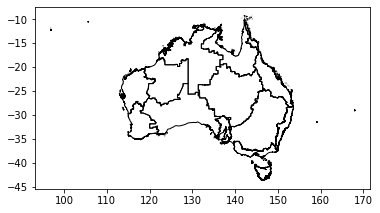

In [7]:
abs_drainage_divisions.plot(facecolor='none', edgecolor='black')

In [59]:
#sec = abs_drainage_divisions[abs_drainage_divisions['ADD_NAME21'] == 'South East Coast (NSW)']
#sec

In [60]:
#PlateCarree_proj4 = ccrs.PlateCarree().proj4_init
#sec_crs = sec.to_crs(PlateCarree_proj4)

In [14]:
reader = shpreader.Reader('shapefiles/ADD_2021_AUST_GDA2020.shp')

In [37]:
divisions = reader.records()

In [38]:
my_list = []
for division in divisions:
    if division.attributes["ADD_NAME21"] == "South East Coast (NSW)":
        my_list.append(division)
        break

In [41]:
sec = my_list[0]

## All data

In [42]:
agcd_file = '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20190101-20220322_daily.nc'

In [43]:
ds = xr.open_dataset(agcd_file)

In [44]:
ds['precip']

<xarray.DataArray 'precip' (time: 1177, lat: 691, lon: 886)>
[720590002 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01T09:00:00 ... 2022-03-22T09:00:00
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
Attributes:
    standard_name:              lwe_thickness_of_precipitation_amount
    long_name:                  Daily precipitation
    units:                      mm
    grid_mapping:               crs
    cell_methods:               time: sum
    ancillary_variables:        number_of_stations
    analysis_version_number:    3.02
    source:                     Interpolated surface observations
    frequency:                  daily
    length_scale_for_analysis:  80.0
    analysis_time:              2018-05-09 22:18:34 UTC

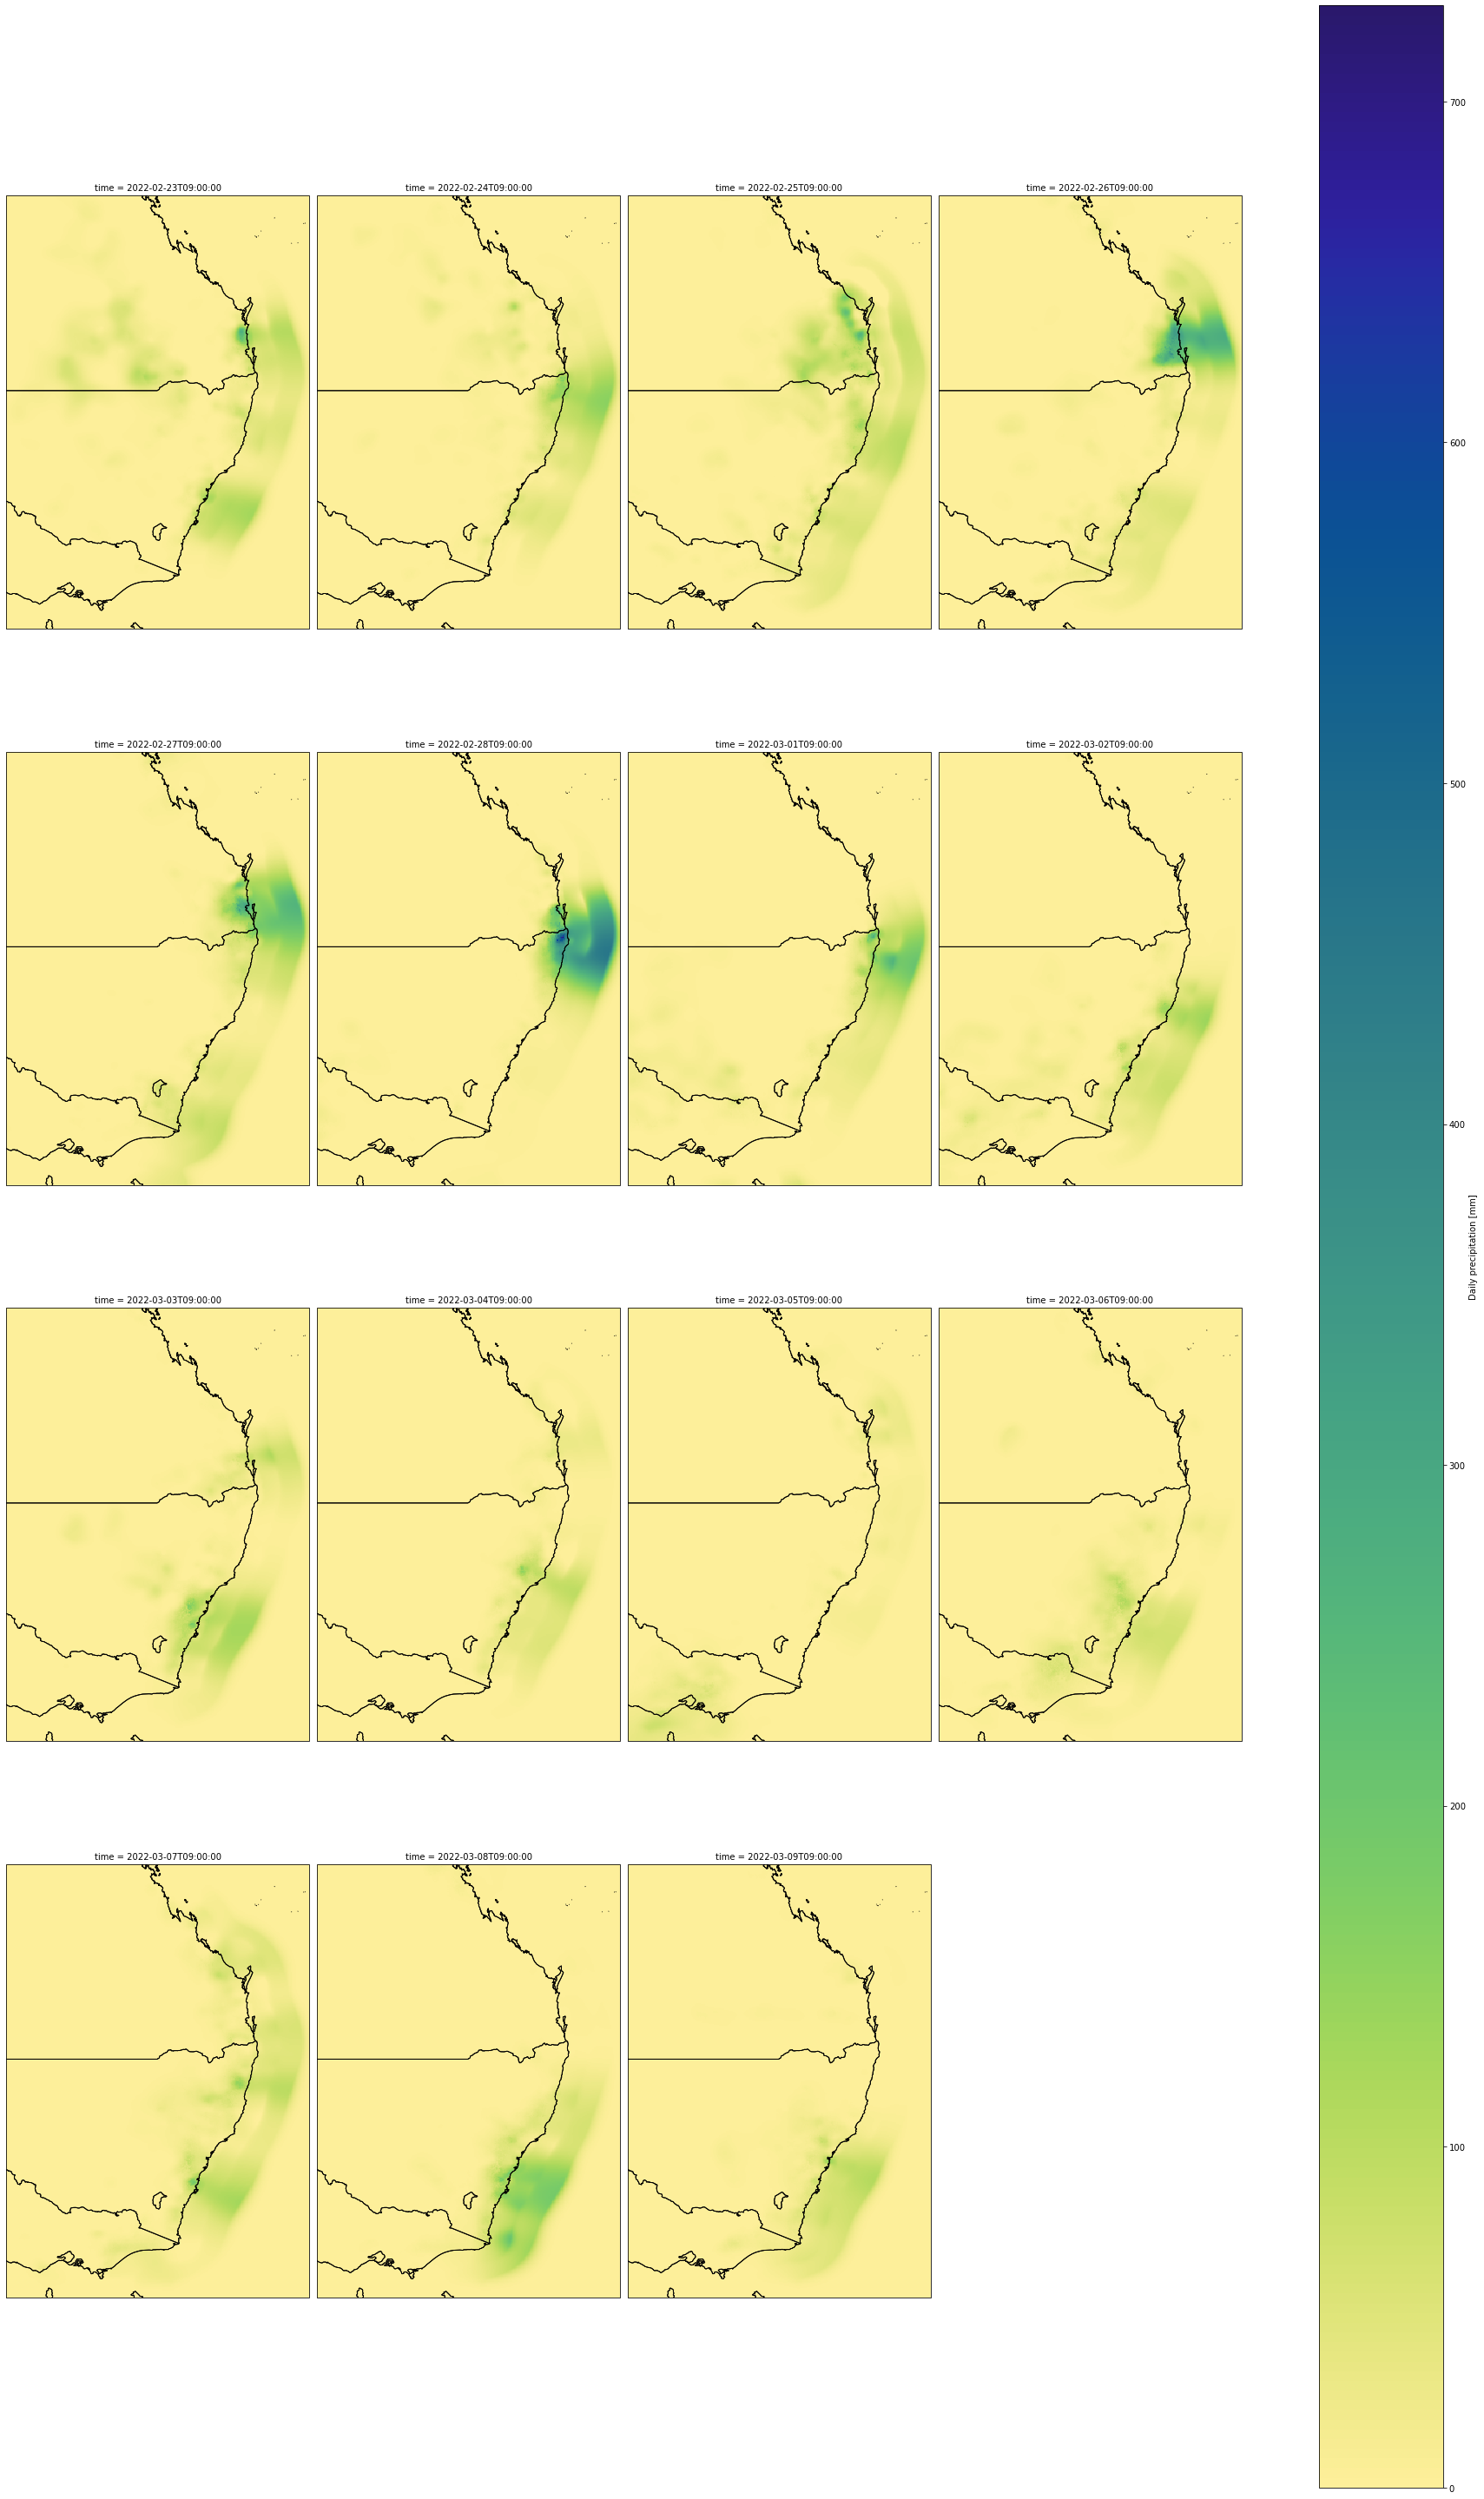

In [7]:
p = ds['precip'].sel(time=slice('2022-02-23', '2022-03-09')).plot(
    col='time',
    col_wrap=4,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline_r,
    figsize=[25, 40],
    subplot_kws={"projection": ccrs.PlateCarree()},
)

for ax in p.axes.flat:
    ax.coastlines()
    ax.add_feature(cartopy.feature.STATES)
    #ax.add_feature(cartopy.feature.RIVERS)
    ax.set_extent([142, 156, -20, -40], crs=ccrs.PlateCarree())

In [45]:
def plot_cities(ax, label_color='white'):
    lats = [-27.4705, -28.8094, -33.8688,]
    lons = [153.0260, 153.2879, 151.2093]
    cities = ['Brisbane', 'Lismore', 'Sydney']
    for lon, lat, city in zip(lons, lats, cities):
        ax.plot(lon, lat, 'ro', zorder=5, transform=ccrs.PlateCarree())
        ax.text(lon + 0.3, lat, city, fontsize='large', color=label_color,
                transform=ccrs.PlateCarree())

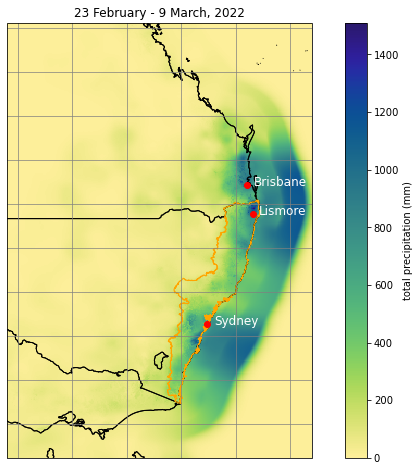

In [53]:
precip_total = ds['precip'].sel(time=slice('2022-02-23', '2022-03-09')).sum(dim=['time'])

fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
precip_total.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline_r,
    cbar_kwargs={'label': 'total precipitation (mm)'}
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.add_geometries(sec.geometry, ccrs.PlateCarree(), facecolor='none', edgecolor='orange')
ax.set_extent([142, 156, -20, -40], crs=ccrs.PlateCarree())
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
for lat in lat_bounds:
    if (lat > ymin) and (lat < ymax):
        ax.axhline(lat, color='0.5', linewidth=0.7)
for lon in lon_bounds:
    if (lon > xmin) and (lon < xmax):
        ax.axvline(lon, color='0.5', linewidth=0.7)
plot_cities(ax)
ax.set_title('23 February - 9 March, 2022')
plt.show()

# Masked data

In [54]:
ds_masked = fileio.open_dataset(agcd_file, shapefile='shapefiles/australia.shp')

In [55]:
ds_masked = ds_masked.compute()

In [56]:
precip_total_masked = ds_masked['precip'].sel(time=slice('2022-02-23', '2022-03-09')).sum(dim=['time'], min_count=1)

In [57]:
precip_total_masked_box = spatial_selection.select_box_region(precip_total_masked, [-40, -20, 149, 154])

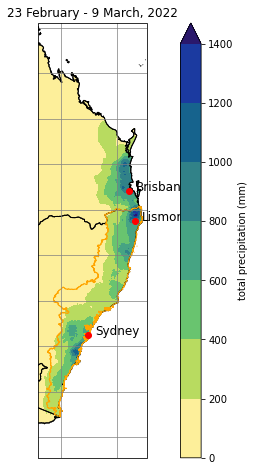

In [58]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
precip_total_masked_box.plot.contourf(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline_r,
    levels=np.arange(0, 1600, 200),
    cbar_kwargs={'label': 'total precipitation (mm)'}
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.add_geometries(sec.geometry, ccrs.PlateCarree(), facecolor='none', edgecolor='orange')
#ax.set_extent([149, 156, -20, -40], crs=ccrs.PlateCarree())
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
for lat in lat_bounds:
    if (lat > ymin) and (lat < ymax):
        ax.axhline(lat, color='0.5', linewidth=0.7)
for lon in lon_bounds:
    if (lon > xmin) and (lon < xmax):
        ax.axvline(lon, color='0.5', linewidth=0.7)
plot_cities(ax, label_color='black')
ax.set_title('23 February - 9 March, 2022')
plt.show()

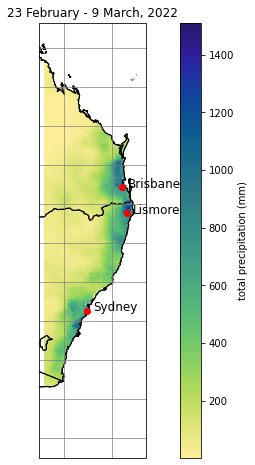

In [15]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
precip_total_masked_box.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline_r,
    cbar_kwargs={'label': 'total precipitation (mm)'}
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
#ax.set_extent([142, 156, -20, -40], crs=ccrs.PlateCarree())
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
for lat in lat_bounds:
    if (lat > ymin) and (lat < ymax):
        ax.axhline(lat, color='0.5', linewidth=0.7)
for lon in lon_bounds:
    if (lon > xmin) and (lon < xmax):
        ax.axvline(lon, color='0.5', linewidth=0.7)
plot_cities(ax, label_color='black')
ax.set_title('23 February - 9 March, 2022')
plt.show()

In [16]:
print(precip_total_masked_box.where(precip_total_masked_box > 200).mean(dim=['lat', 'lon']))

<xarray.DataArray 'precip' ()>
array(436.782, dtype=float32)


## Event data

In [17]:
agcd_files = glob.glob('/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_*_daily.nc')
agcd_files.sort()

['/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19000101-19001231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19010101-19011231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19020101-19021231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19030101-19031231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19040101-19041231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19050101-19051231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19060101-19061231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19070101-19071231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19080101-19081231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19090101-19091231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19100101-19101231_daily.nc',

In [19]:
ds_list = []
for infile in agcd_files:
    print(infile)
    ds = fileio.open_dataset(infile, shapefile='shapefiles/australia.shp')
    ds = spatial_selection.select_box_region(ds, [-40, -20, 149, 154])
    ds = ds.where(precip_total_masked_box > 200).mean(dim=['lat', 'lon'])
    ds = ds.compute()
    ds_list.append(ds)

/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19000101-19001231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19010101-19011231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19020101-19021231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19030101-19031231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19040101-19041231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19050101-19051231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19060101-19061231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19070101-19071231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19080101-19081231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19090101-19091231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19100101-19101231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total

/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19950101-19951231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19960101-19961231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19970101-19971231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19980101-19981231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19990101-19991231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20000101-20001231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20010101-20011231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20020101-20021231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20030101-20031231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20040101-20041231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20050101-20051231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total

/g/data/xv83/dbi599/miniconda3/envs/unseen/lib/python3.9/site-packages/xarray/core/indexing.py:1234: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


In [20]:
ds = xr.concat(ds_list, dim='time')

In [21]:
ds

<xarray.Dataset>
Dimensions:   (time: 44641, bnds: 2)
Coordinates:
  * time      (time) object 1900-01-01 09:00:00 ... 2022-03-22 09:00:00
Dimensions without coordinates: bnds
Data variables:
    crs       float64 1.0
    lon_bnds  (time, bnds) float32 151.7 151.8 151.7 151.8 ... 151.8 151.7 151.8
    lat_bnds  (time, bnds) float32 -30.66 -30.61 -30.66 ... -30.61 -30.66 -30.61
    precip    (time) float32 2.884 0.2964 0.1661 0.5041 ... 3.066 0.1654 0.01369

In [22]:
ds = ds.compute()

In [23]:
ds_15day = ds.rolling({'time': 15}).sum()

In [32]:
ds_15day['precip'].attrs['units'] = 'mm'

In [36]:
ds_rx15day = time_utils.temporal_aggregation(ds_15day, 'A-AUG', 'D', 'max', ['precip'])

In [37]:
ds_rx15day['precip']

<xarray.DataArray 'precip' (time: 123)>
array([165.79832458, 155.31884766, 115.96695709, 117.20276642,
       142.49285889, 164.61599731, 116.26812744, 151.46723938,
       188.01235962,  88.27331543, 148.33666992, 205.27133179,
       110.09849548, 142.58807373, 163.34326172, 134.5014801 ,
       150.20323181, 149.15260315, 173.20848083, 166.55149841,
       156.92349243, 159.01045227, 239.76133728,  92.50057983,
       101.01006317, 140.10484314, 117.26512909, 214.66424561,
       270.48022461, 288.88296509, 145.12814331, 193.93435669,
       138.37548828, 153.45245361, 157.54017639, 112.56732941,
       101.2951355 , 213.51026917, 185.66116333, 218.7833252 ,
        75.99666595, 123.64720917, 140.24700928, 153.84603882,
       130.29560852, 203.20475769, 189.11390686, 172.9186554 ,
       180.65000916, 151.82130432, 247.4778595 , 234.15524292,
       149.09515381, 187.65138245, 287.47531128, 157.67402649,
       279.06872559, 104.28580475, 129.34646606, 150.58631897,
       155.83468628, 151.47390747, 187.56193542, 267.02032471,
       124.28919983, 136.85856628, 128.43746948, 222.519104  ,
       274.5652771 , 107.37999725, 120.16088867, 258.90716553,
       177.19961548, 207.33404541, 214.36070251, 153.20309448,
       218.5539856 , 233.44236755, 254.6960907 , 113.17771912,
       187.37820435, 162.60928345, 142.78620911, 181.70353699,
       129.53672791, 145.70709229, 128.068573  , 123.59275818,
       297.8868103 , 251.05754089, 219.13917542, 152.54774475,
       182.90328979, 101.07294464, 126.95540619, 161.71711731,
       250.09587097, 112.27557373, 109.42681122, 186.03036499,
       116.32250977, 215.65036011, 129.06559753, 156.08662415,
       152.70729065, 140.57797241, 135.37945557, 128.67216492,
       178.54885864, 169.76057434, 157.95904541, 199.09844971,
       205.26617432, 301.41702271, 159.22793579, 168.26533508,
       158.57949829, 223.24636841, 138.60342407, 131.59587097,
       294.18984985, 296.41394043, 436.7819519 ])
Coordinates:
  * time     (time) object 1900-08-31 00:00:00 ... 2022-08-31 00:00:00
Attributes:
    units:    mm

Text(0.5, 1.0, 'Rx15day, AGCD')

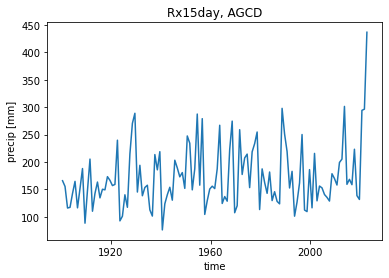

In [40]:
ds_rx15day['precip'].plot()
plt.title('Rx15day, AGCD')